In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train['Age'].isnull()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,True
889,False


In [26]:
train.drop(columns = ['Cabin'], inplace = True)

In [27]:
test.drop(columns = ['Cabin'], inplace = True)

In [29]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [33]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [34]:
train['Embarked'].fillna('S', inplace = True)

In [35]:
test['Fare'].mean()

35.627188489208635

In [37]:
test['Fare'].describe()


,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


In [38]:
test['Fare'].fillna(35, inplace = True)

In [39]:
train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [40]:
train['Age'].isnull()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,True
889,False


In [41]:
train[train.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [43]:
train[train.isnull().any(axis = 1)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [56]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std() , 177)
print(train_age)

[19 27 39 42 18 30 38 43 33 38 36 43 32 21 17 30 17 38 40 35 16 17 19 19
 16 20 27 35 43 40 29 36 26 42 35 17 32 25 16 27 34 20 27 26 42 43 40 40
 42 24 36 21 32 16 39 32 17 37 41 38 42 15 20 30 20 36 42 43 35 39 26 25
 43 38 41 31 28 32 26 36 30 24 26 33 38 26 22 42 30 16 40 38 34 31 40 39
 40 17 39 37 37 30 22 36 15 28 26 15 41 41 31 23 41 15 20 20 32 39 18 29
 34 26 25 27 31 35 25 19 42 33 33 20 34 25 28 19 43 26 23 30 43 35 15 25
 43 23 17 23 36 17 43 36 19 17 41 40 42 29 43 38 27 29 20 30 19 40 31 26
 24 34 40 20 25 32 37 34 31]


In [52]:
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std() , 86)
print(test_age)

[39 30 27 37 22 35 33 25 20 31 24 18 39 43 41 37 17 29 23 23 34 26 30 24
 35 38 24 29 18 31 22 38 42 34 41 18 27 20 17 36 17 16 39 17 16 24 16 35
 31 27 33 42 32 41 40 21 40 40 39 21 39 34 23 22 30 17 30 22 24 25 22 25
 20 30 17 40 39 38 25 22 21 42 28 36 37 41]


In [58]:
train['Age'][train['Age'].isnull()] = train_age

In [59]:
test['Age'][test['Age'].isnull()] = test_age

In [60]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [61]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


eda


In [62]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,31.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


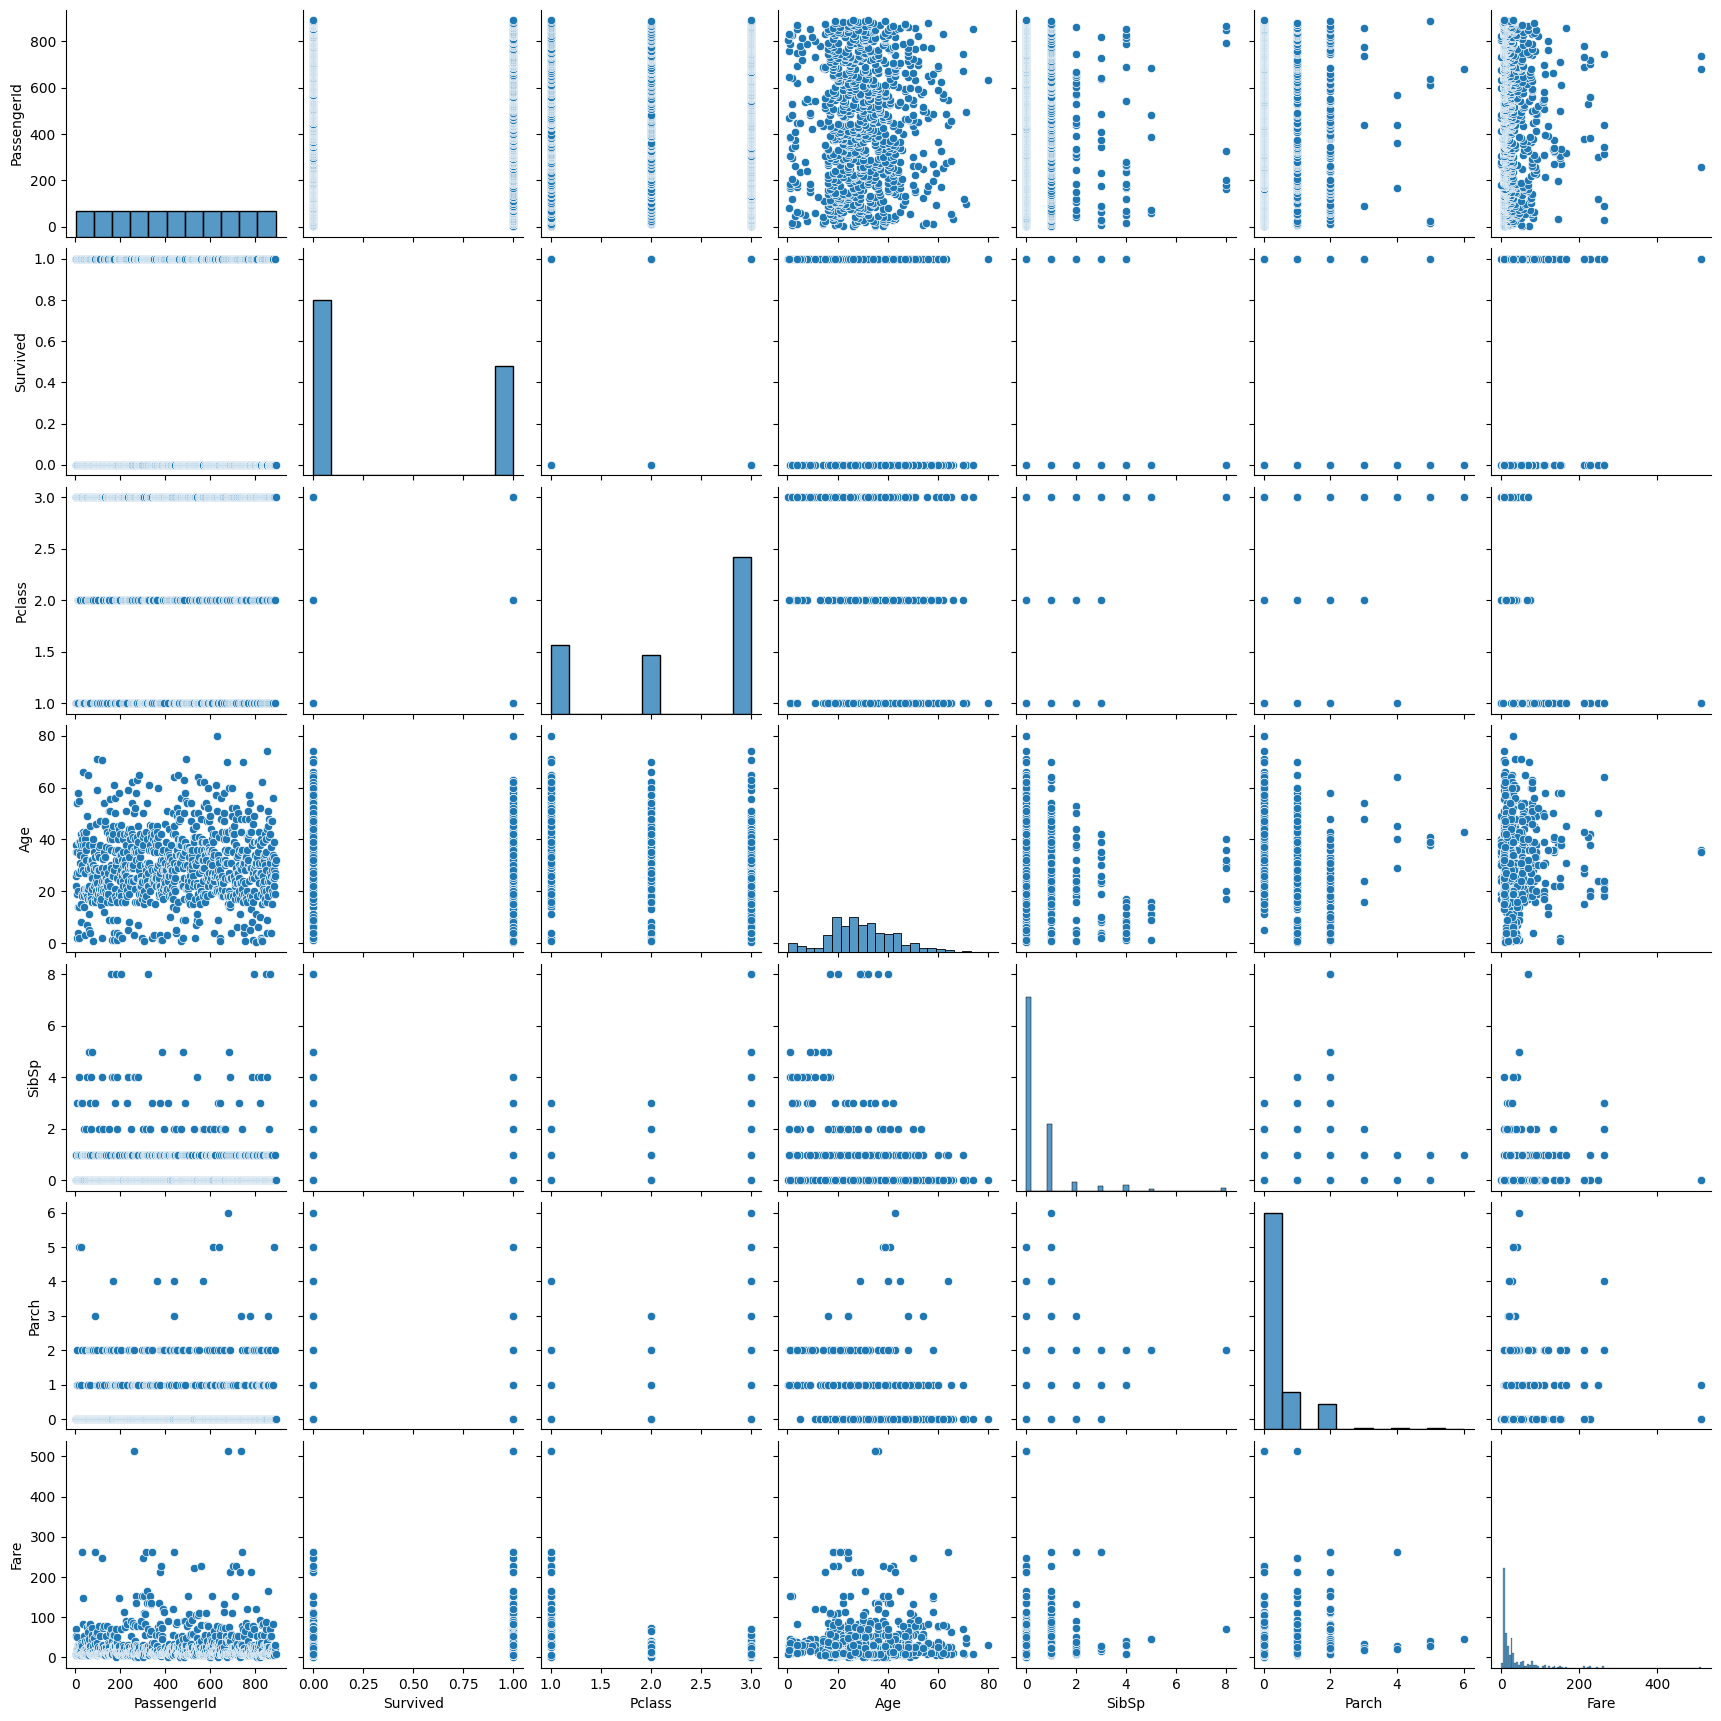

In [63]:
sns.pairplot(train)

<Axes: xlabel='PassengerId', ylabel='Count'>

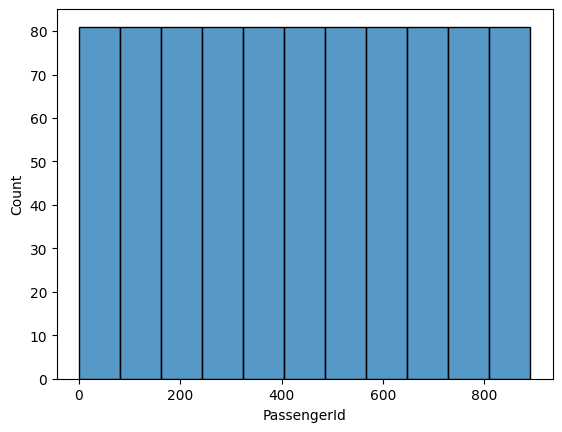

In [65]:
sns.histplot(train['PassengerId'])

<Axes: xlabel='Survived', ylabel='Age'>

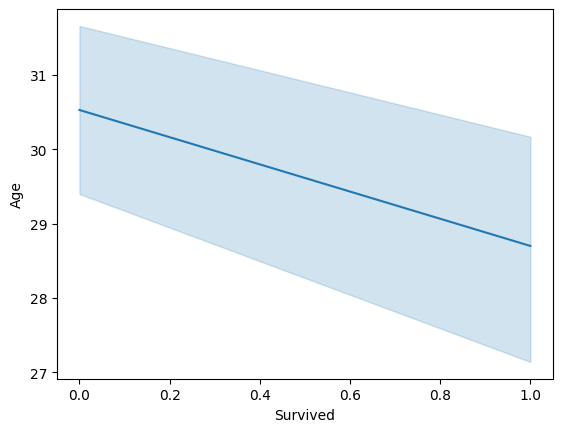

In [71]:
sns.lineplot(x="Survived", y="Age", data=train)

<Axes: xlabel='Survived', ylabel='Age'>

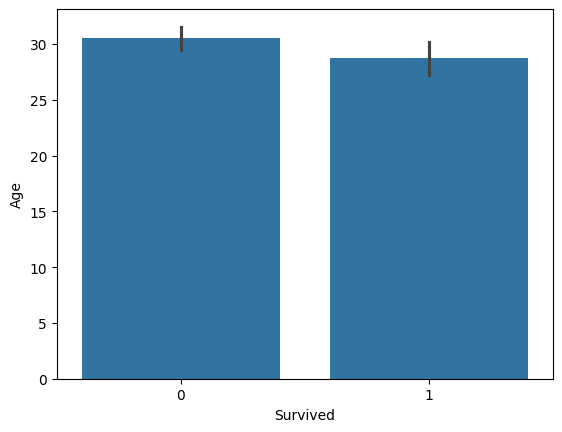

In [70]:
sns.barplot(x="Survived", y="Age", data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

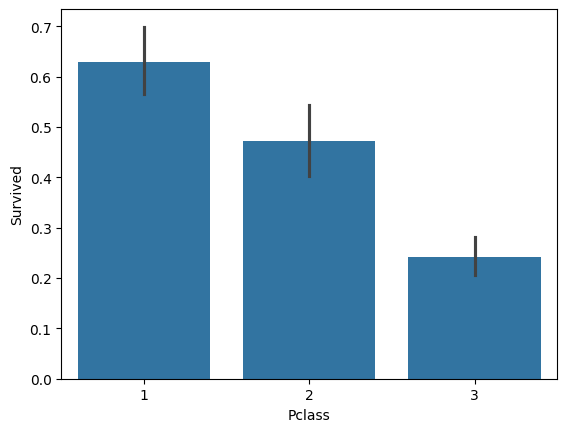

In [75]:
sns.barplot(x="Pclass", y="Survived", data=train)

In [77]:
train[train['Pclass']==1]['Survived'].value_counts()

,count
Survived,
1,136
0,80


In [86]:
train[train['Pclass']==1].value_counts().sum()

216

In [85]:
train.groupby(['Pclass'])['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [87]:
train.groupby(['Sex'])['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [88]:
train.groupby(['Embarked'])['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


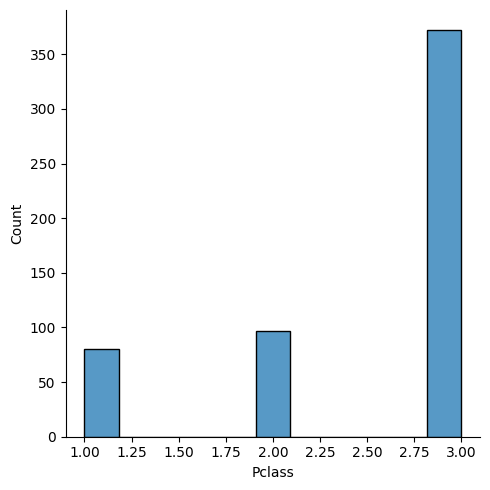

In [92]:
sns.displot(train['Pclass'][train['Survived']==0])

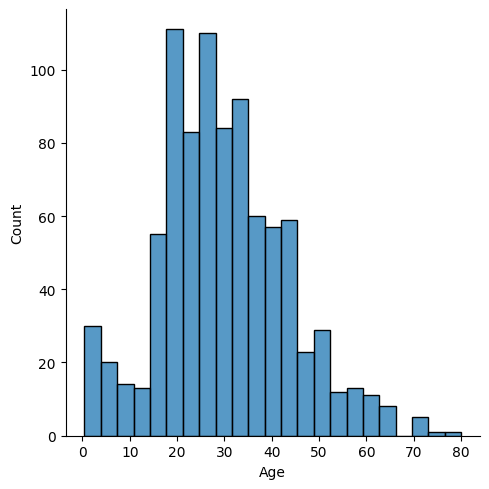

In [90]:
sns.displot(train['Age'])

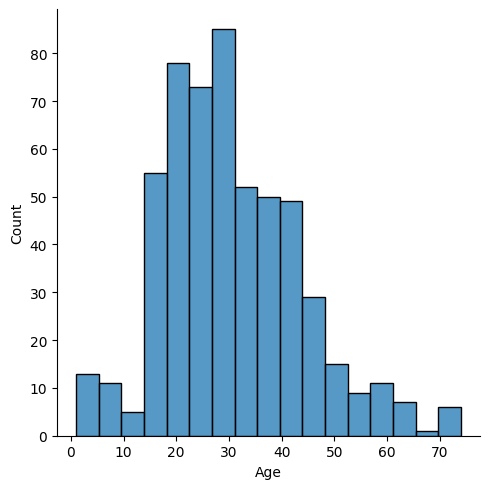

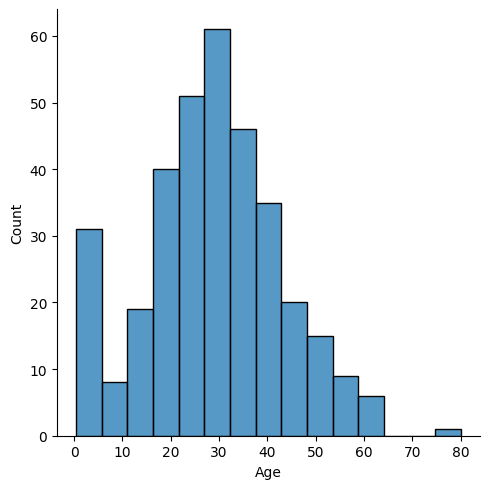

In [93]:
sns.displot(train['Age'][train['Survived']==0])
sns.displot(train['Age'][train['Survived']==1])

<Axes: xlabel='Age', ylabel='Count'>

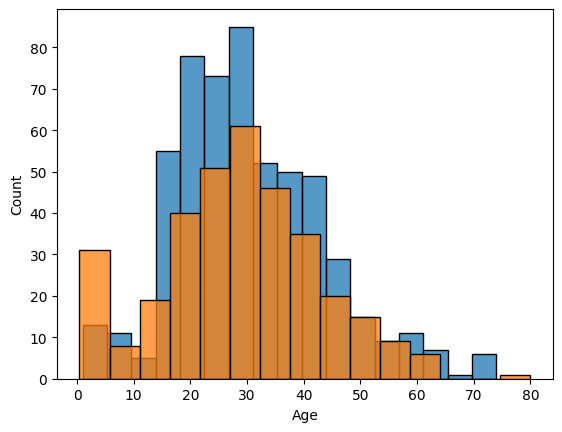

In [95]:
sns.histplot(train['Age'][train['Survived']==0])
sns.histplot(train['Age'][train['Survived']==1])

In [99]:
train.groupby(['Fare'])['Survived'].mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


<Axes: xlabel='Fare', ylabel='Count'>

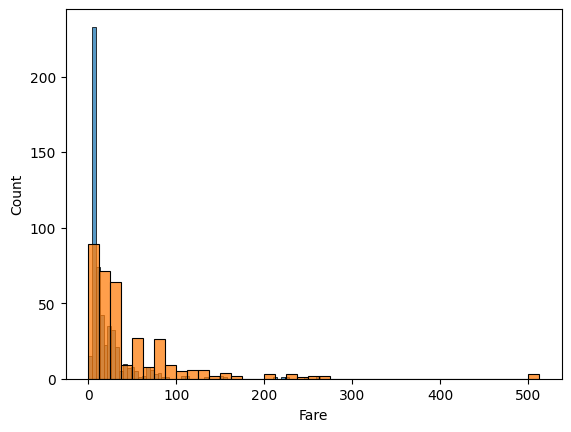

In [100]:
sns.histplot(train['Fare'][train['Survived']==0])
sns.histplot(train['Fare'][train['Survived']==1])

In [101]:
train.drop(columns = ['Name', 'Ticket'], inplace = True)
test.drop(columns = ['Name', 'Ticket'], inplace = True)

In [102]:
train['family'] = train['Parch'] + train['SibSp'] + 1
test['family'] = test['Parch'] + test['SibSp'] + 1

In [103]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,31.0,1,2,23.4500,S,4
889,890,1,1,male,26.0,0,0,30.0000,C,1


In [104]:
train['family'].value_counts()

,count
family,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


<Axes: xlabel='family', ylabel='Density'>

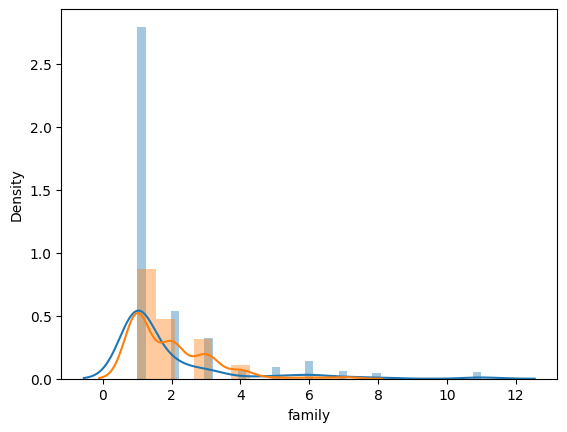

In [106]:
sns.distplot(train['family'][train['Survived']==0])
sns.distplot(train['family'][train['Survived']==1])

In [107]:
train.groupby(['family'])['Survived'].mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [116]:
def calnum(number):
  if number==1:
    return "alone"
  elif number>1 and number<5:
    return "medium"
  else:
    return "many"

In [117]:
train['family_size'] = train['family'].apply(calnum)

In [118]:
test['family_size'] = test['family'].apply(calnum)

In [119]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,male,22.0,1,0,7.2500,S,2,medium
1,2,1,1,female,38.0,1,0,71.2833,C,2,medium
2,3,1,3,female,26.0,0,0,7.9250,S,1,alone
3,4,1,1,female,35.0,1,0,53.1000,S,2,medium
4,5,0,3,male,35.0,0,0,8.0500,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,alone
887,888,1,1,female,19.0,0,0,30.0000,S,1,alone
888,889,0,3,female,31.0,1,2,23.4500,S,4,medium
889,890,1,1,male,26.0,0,0,30.0000,C,1,alone


In [120]:
train['family_size'].value_counts()

,count
family_size,
alone,537
medium,292
many,62


In [122]:
train.drop(columns = ['family','SibSp','Parch'], inplace = True)
test.drop(columns = ['family','SibSp','Parch'], inplace = True)

In [123]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,1,0,3,male,22.0,7.2500,S,medium
1,2,1,1,female,38.0,71.2833,C,medium
2,3,1,3,female,26.0,7.9250,S,alone
3,4,1,1,female,35.0,53.1000,S,medium
4,5,0,3,male,35.0,8.0500,S,alone


In [124]:
train.shape

(891, 8)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   family_size  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [126]:
passengerid = test['PassengerId'].values

In [127]:
train.drop(columns = ['PassengerId'], inplace = True)
test.drop(columns = ['PassengerId'], inplace = True)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   family_size  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [137]:
train = pd.get_dummies(train, columns = ['Pclass','Sex', 'Embarked', 'family_size'], drop_first = True)

In [139]:
train.shapeest

(891, 10)

In [140]:
test = pd.get_dummies(test, columns = ['Pclass','Sex', 'Embarked', 'family_size'], drop_first = True)

In [141]:
X = train.drop(columns = ['Survived'])
y = train['Survived']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

USING DECISION TREE

In [143]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
y_pred = classifier.predict(X_test)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7821229050279329

USING RANDOM FORETS

In [161]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier()
classifier1.fit(X_train, y_train)

RandomForestClassifier()

In [194]:
y_pred1 = classifier1.predict(X_test)

In [195]:
accuracy_score(y_pred1, y_test)

0.8379888268156425

USING NEURAL NETWORKS

In [164]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [183]:
model = Sequential()
model.add(Dense(150, activation = 'relu', input_shape=(X_train.shape[1],))) # Changed input shape to match X_train
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'linear'))

In [180]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 42)                  │           5,418 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             430 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,128 (27.84 KB)

 Trainable params: 7,128 (27.84 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
model.compile(loss = SparseCategoricalCrossentropy(from_logits = True), optimizer = Adam(learning_rate=1e-5,), metrics = ['accuracy'])

In [186]:
model.fit(X_train, y_train, epochs = 60, validation_split=0.2)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1341 - loss: 3.7129 - val_accuracy: 0.1538 - val_loss: 2.9532
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1431 - loss: 3.4644 - val_accuracy: 0.1678 - val_loss: 2.7401
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1600 - loss: 3.1743 - val_accuracy: 0.1748 - val_loss: 2.5453
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1647 - loss: 2.7645 - val_accuracy: 0.1818 - val_loss: 2.3714
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1813 - loss: 2.6724 - val_accuracy: 0.1888 - val_loss: 2.2210
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1835 - loss: 2.3497 - val_accuracy: 0.2028 - val_loss: 2.0861
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2097 - loss: 2.2550 - val_accuracy: 0.2238 - val_loss: 1.9633
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2101 - loss: 2.0843 - val_accuracy: 0.2797 - val_loss

In [187]:
y_prob = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [188]:
y_pred2 = y_prob.argmax(axis=1)

In [189]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)

0.6703910614525139


ACCURACY FOR DECISION TREE

In [192]:
y_pred_final = classifier.predict(X_test)  # Predict on the test set, not the entire 'test' dataset
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



ACCURACY FOR RANDOM FORESTS

In [193]:
y_pred_final = classifier1.predict(X_test)  # Predict on the test set, not the entire 'test' dataset
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [198]:
Xf = test.iloc[:,:].values

In [200]:
y_final = classifier1.predict(Xf)

In [201]:
passengerid.shape

(418,)

In [202]:
final = pd.DataFrame()

In [203]:
final['PassengerId'] = passengerid
final['Survived'] = y_final

In [204]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [205]:
final.to_csv('submission.csv',index=False)